# Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../content/Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
data_for_clustering=data.drop('country',axis=1)
data_for_clustering

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


First, we have to scale the data.

In [4]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data_for_clustering)
data_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]], shape=(167, 9))

## Linkage

[linkage() function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

[pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)

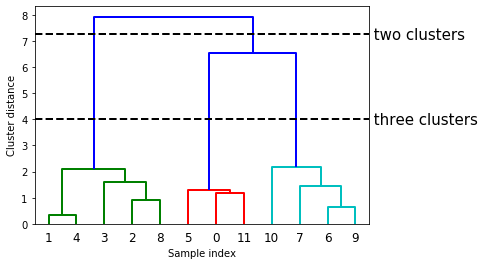

In [5]:
# Ward's minimum variance method minimizes the total within-cluster variance.

"""
- Each row in the linkage matrix represents a merge between two clusters.
- The matrix has four columns:
Column 1: The index of the first cluster being merged.
Column 2: The index of the second cluster being merged.
Column 3: The distance (or dissimilarity) between the two clusters being merged.
Column 4: The number of original observations in the newly formed cluster.

"""
linkage_matrix=linkage(data_scaled,method='ward')
linkage_matrix

array([[4.10000000e+01, 1.21000000e+02, 2.70510920e-01, 2.00000000e+00],
       [7.50000000e+01, 1.39000000e+02, 3.45939626e-01, 2.00000000e+00],
       [2.40000000e+01, 8.50000000e+01, 4.23131474e-01, 2.00000000e+00],
       [1.11000000e+02, 1.58000000e+02, 4.94330379e-01, 2.00000000e+00],
       [6.00000000e+01, 1.22000000e+02, 5.44105161e-01, 2.00000000e+00],
       [1.00000000e+02, 1.69000000e+02, 5.58805736e-01, 3.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 5.59540632e-01, 2.00000000e+00],
       [5.30000000e+01, 1.44000000e+02, 5.68799380e-01, 2.00000000e+00],
       [2.90000000e+01, 5.40000000e+01, 5.90319960e-01, 2.00000000e+00],
       [2.00000000e+01, 1.30000000e+02, 6.04562360e-01, 2.00000000e+00],
       [6.00000000e+00, 7.60000000e+01, 6.13397046e-01, 2.00000000e+00],
       [5.60000000e+01, 1.29000000e+02, 6.27531275e-01, 2.00000000e+00],
       [4.30000000e+01, 1.35000000e+02, 6.39912838e-01, 2.00000000e+00],
       [5.10000000e+01, 9.00000000e+01, 6.49519933e

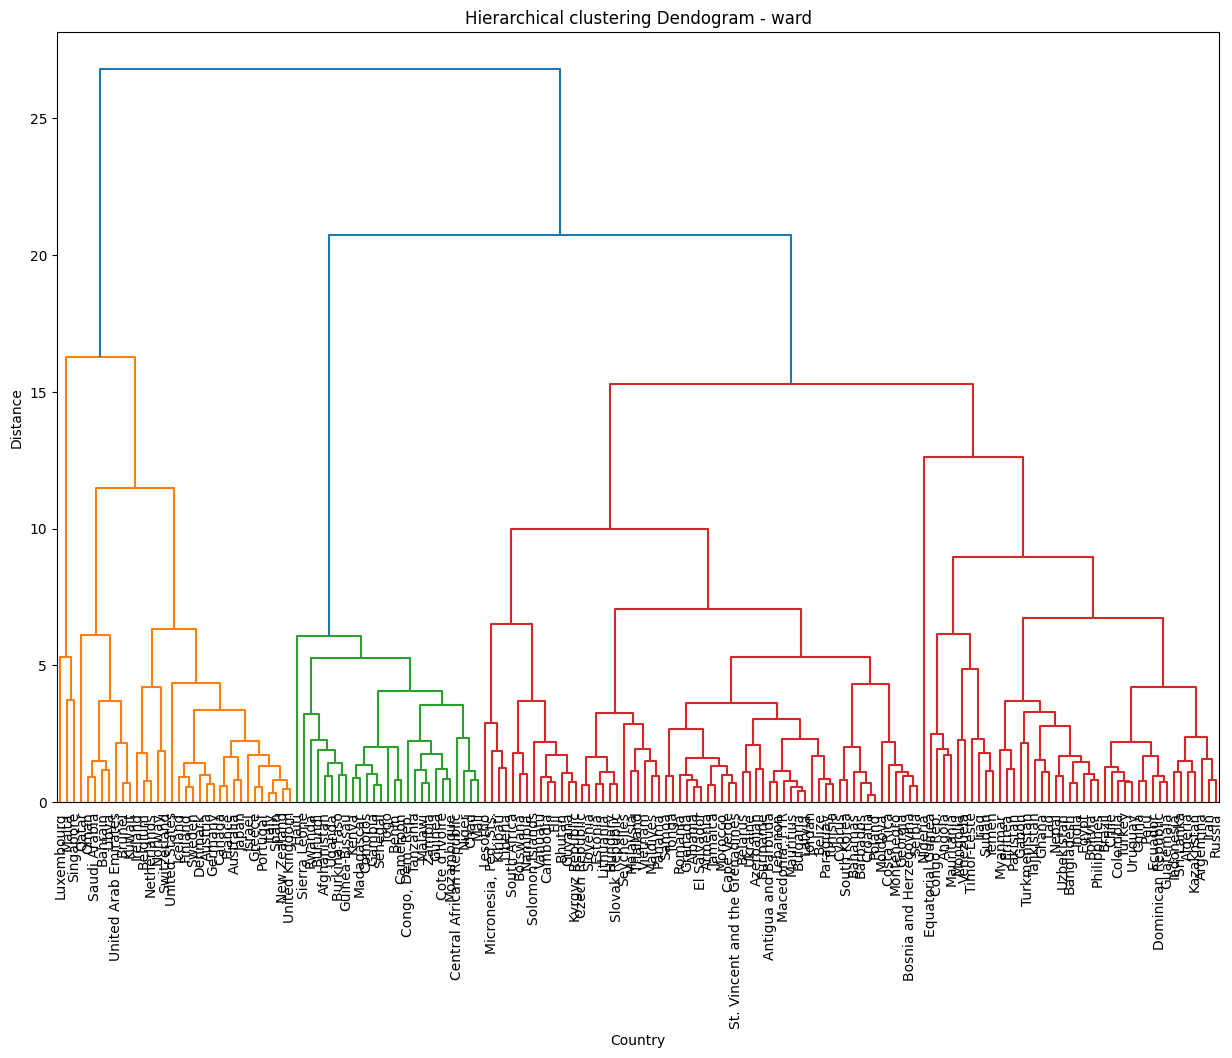

In [6]:
plt.figure(figsize=(15,10))
dendrogram(linkage_matrix,labels=data['country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical clustering Dendogram - ward")
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

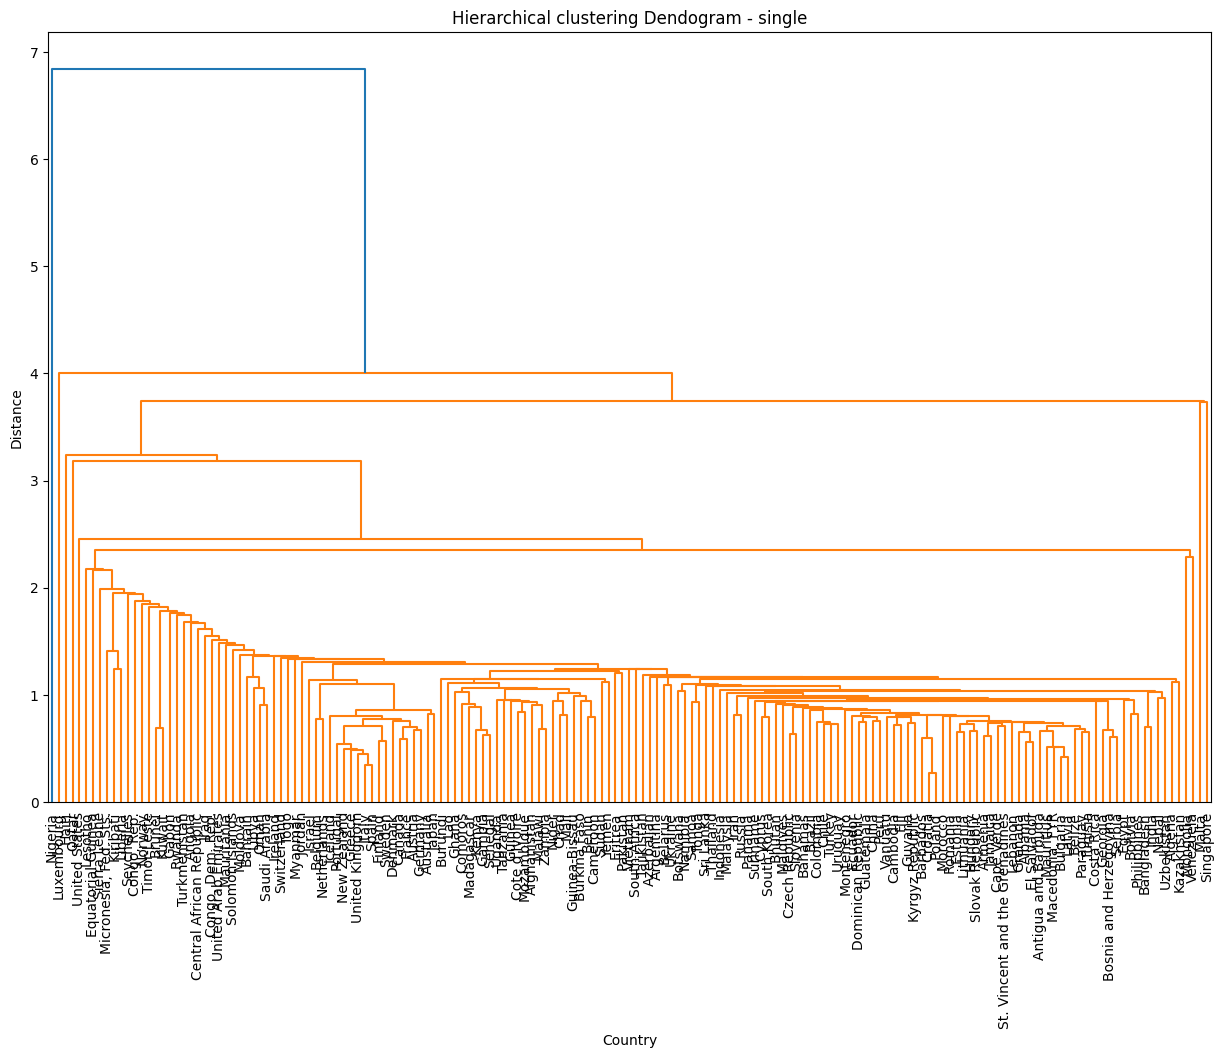

In [7]:
# method='single' is referred to single linkage method
linkage_matrix2=linkage(data_scaled,method='single')
plt.figure(figsize=(15,10))
dendrogram(linkage_matrix2,labels=data['country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical clustering Dendogram - single")
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

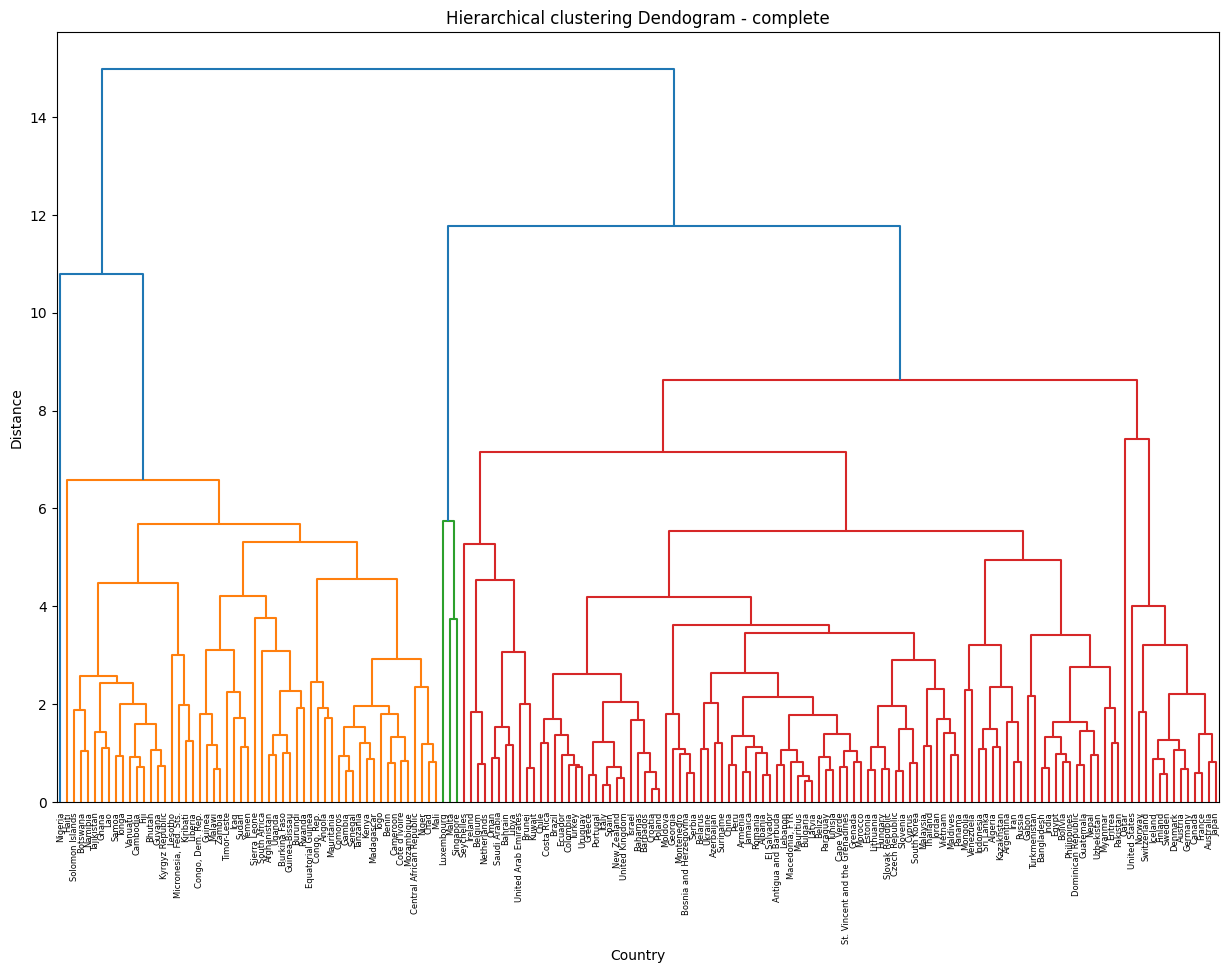

In [8]:
# method='complete' is referred to complete linkage method
linkage_matrix2=linkage(data_scaled,method='complete')
plt.figure(figsize=(15,10))
dendrogram(linkage_matrix2,labels=data['country'].values, leaf_rotation=90, leaf_font_size=6)
plt.title("Hierarchical clustering Dendogram - complete")
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

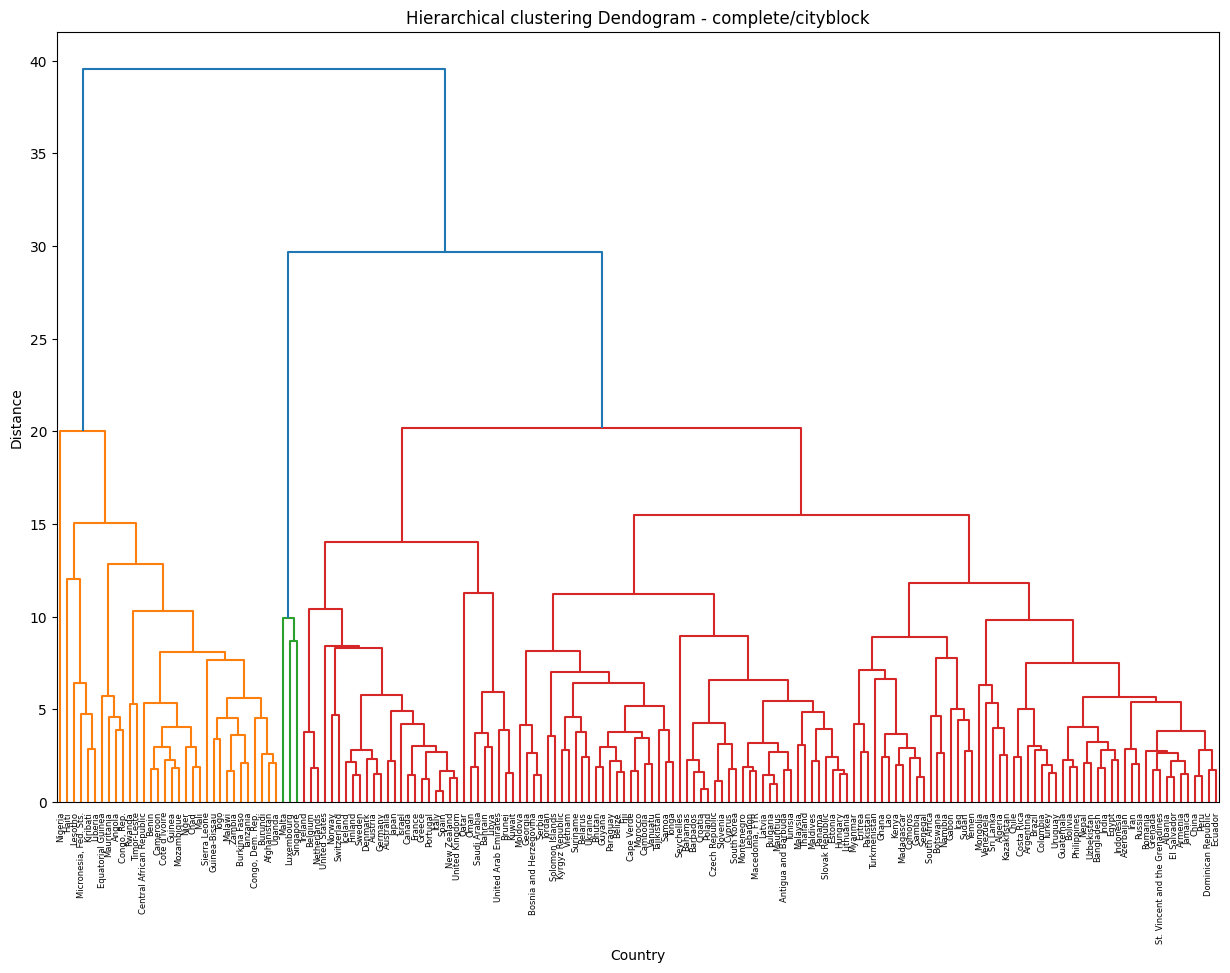

In [9]:
# metric='cityblock' is referred to Manhattan distance
linkage_matrix2=linkage(data_scaled,metric='cityblock',method='complete')
plt.figure(figsize=(15,10))
dendrogram(linkage_matrix2,labels=data['country'].values, leaf_rotation=90, leaf_font_size=6)
plt.title("Hierarchical clustering Dendogram - complete/cityblock")
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

## Agglomerative Clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
ac=AgglomerativeClustering(n_clusters=3,metric='euclidean', linkage='complete')
pred = ac.fit_predict(data_scaled)
pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [12]:
ac.get_params()

{'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'complete',
 'memory': None,
 'metric': 'euclidean',
 'n_clusters': 3}

In [13]:
data_for_clustering['cluster']=pred
data_for_clustering

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [14]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_score(data_scaled,pred)

np.float64(0.29005247526122313)

In [16]:
from sklearn.metrics import silhouette_samples

In [17]:
silhouette_vals=silhouette_samples(data_scaled, pred)
silhouette_vals

array([ 0.46660223,  0.38513305,  0.24608644,  0.35547117,  0.41975002,
        0.28070423,  0.29599774,  0.39248107,  0.41391483,  0.23913542,
        0.42890491,  0.40179065,  0.08894813,  0.44023635,  0.31434508,
        0.36394838,  0.23581847,  0.41190251, -0.16027166,  0.07094823,
        0.34579086,  0.14465162,  0.30650372,  0.29495415,  0.41406631,
        0.46581692,  0.37844194,  0.00702736,  0.42696419,  0.40149005,
        0.17874969,  0.39348309,  0.43841843,  0.44888775,  0.34835345,
        0.33406578,  0.35985778,  0.43651894,  0.21929847,  0.37269928,
        0.44366494,  0.46310538,  0.46083574,  0.43933776,  0.37603875,
        0.27267249,  0.30638705,  0.12144396,  0.3122802 ,  0.19269724,
       -0.26837704,  0.39389223, -0.11037739,  0.43500501,  0.38972012,
       -0.15150616,  0.40275165,  0.2794823 ,  0.4158082 ,  0.3574433 ,
        0.43468906,  0.30216321,  0.09146437,  0.4619727 ,  0.43394005,
       -0.02502904,  0.29613479,  0.36373249,  0.43576071, -0.03

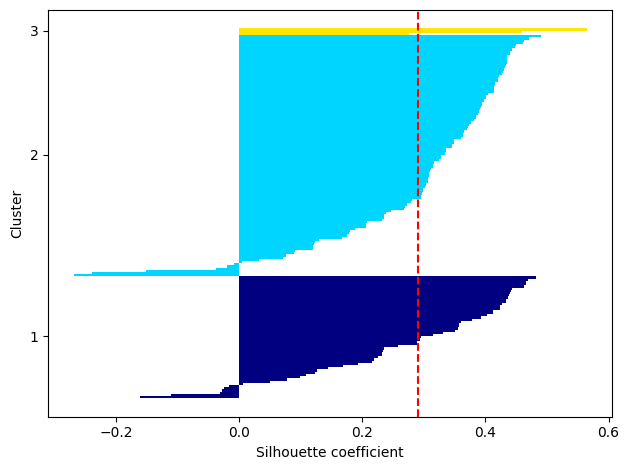

In [18]:
import numpy as np
from matplotlib import cm
num_clusters=3
cluster_labels = np.unique(pred)

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[pred == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / num_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
#Procedures that adjust the parameters of the plot so that they are well matched to the figure.
plt.tight_layout()
plt.show()

In [19]:
data_for_clustering['cluster']= pred

In [20]:
print('Cluster summary:')
summary = data_for_clustering.groupby(['cluster']).mean()
summary['count'] = data_for_clustering['cluster'].value_counts()
summary = summary.sort_values(by='count', ascending=False)
summary

Cluster summary:


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,count
cluster,,,,,,,,,,
1,17.028440,42.291550,6.909358,43.039137,22581.559633,6.478321,75.302752,2.098073,17310.458716,109
0,82.229091,31.407636,6.631273,48.534545,3812.236364,10.655000,60.554545,4.717818,1917.709091,55
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,3
